<a href="https://colab.research.google.com/github/Gabrielamb2/MachineLearning/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [53]:
!pip install geopandas

In [55]:
!pip install folium

In [56]:
#general
import os
import numpy as np
import pandas as pd 

#plotting 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

#mapping
import geopandas as gpd 
import folium
from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime
import branca.colormap as colormap
from collections import defaultdict

In [37]:
microplastics_path = "../MICROPLASTIC_DATA_BASED_ON_LAT_LONG/"
microplastics_path_adv = microplastics_path+ "ADVENTURE_MICRO_FROM_SCIENTIST.csv"
microplastics_path_geo = microplastics_path+ "GEOMARINE_MICRO.csv"
microplastics_path_sea = microplastics_path+ "SEA_MICRO.csv"

In [38]:
import os
os.listdir(microplastics_path)

['ADVENTURE_MICRO_FROM_SCIENTIST.csv', 'GEOMARINE_MICRO.csv', 'SEA_MICRO.csv']

In [39]:
microplastics_path_sea

'../MICROPLASTIC_DATA_BASED_ON_LAT_LONG/SEA_MICRO.csv'

In [40]:
df_microplatic_sea = pd.read_csv(microplastics_path_geo)

In [41]:
df_microplatic_sea.head(5).transpose()

,0,1,2,3,4
Date,2017-10-01,2017-10-01,2017-10-01,2017-10-23,2017-10-25
Latitude,38.3358,36.7964,36.7072,36.1165,35.3927
Longitude,-9.25006,-7.94414,-2.7377,-4.25404,-12.1803
MP_conc__particles_cubic_metre_,180,307,280,212,63
Normalized,0.515759,0.879656,0.802292,0.60745,0.180516


In [65]:
def format_date(df):
    df['Date'] =pd.to_datetime(df['Date'],errors='coerce')
    df['year'] = df['Date'].dt.year
    return df

format_date(df_microplatic_sea)

,Date,Latitude,Longitude,MP_conc__particles_cubic_metre_,Normalized,year
0,2017-10-01,38.335844,-9.250058,180,0.515759,2017
1,2017-10-01,36.796376,-7.944142,307,0.879656,2017
2,2017-10-01,36.707197,-2.737703,280,0.802292,2017
3,2017-10-23,36.116504,-4.254036,212,0.607450,2017
4,2017-10-25,35.392750,-12.180278,63,0.180516,2017
...,...,...,...,...,...,...
79,2018-07-05,45.986297,-6.709303,7,0.020057,2018
80,2018-07-06,44.452244,-7.960459,3,0.008596,2018
81,2018-07-06,42.845245,-9.086077,10,0.028653,2018
82,2018-07-07,41.097380,-9.139894,3,0.008596,2018


In [45]:
num_microplatic_sea = df_microplatic_sea.columns.drop('Date')
num_microplatic_sea

Index(['Latitude', 'Longitude', 'MP_conc__particles_cubic_metre_',
       'Normalized'],
      dtype='object')

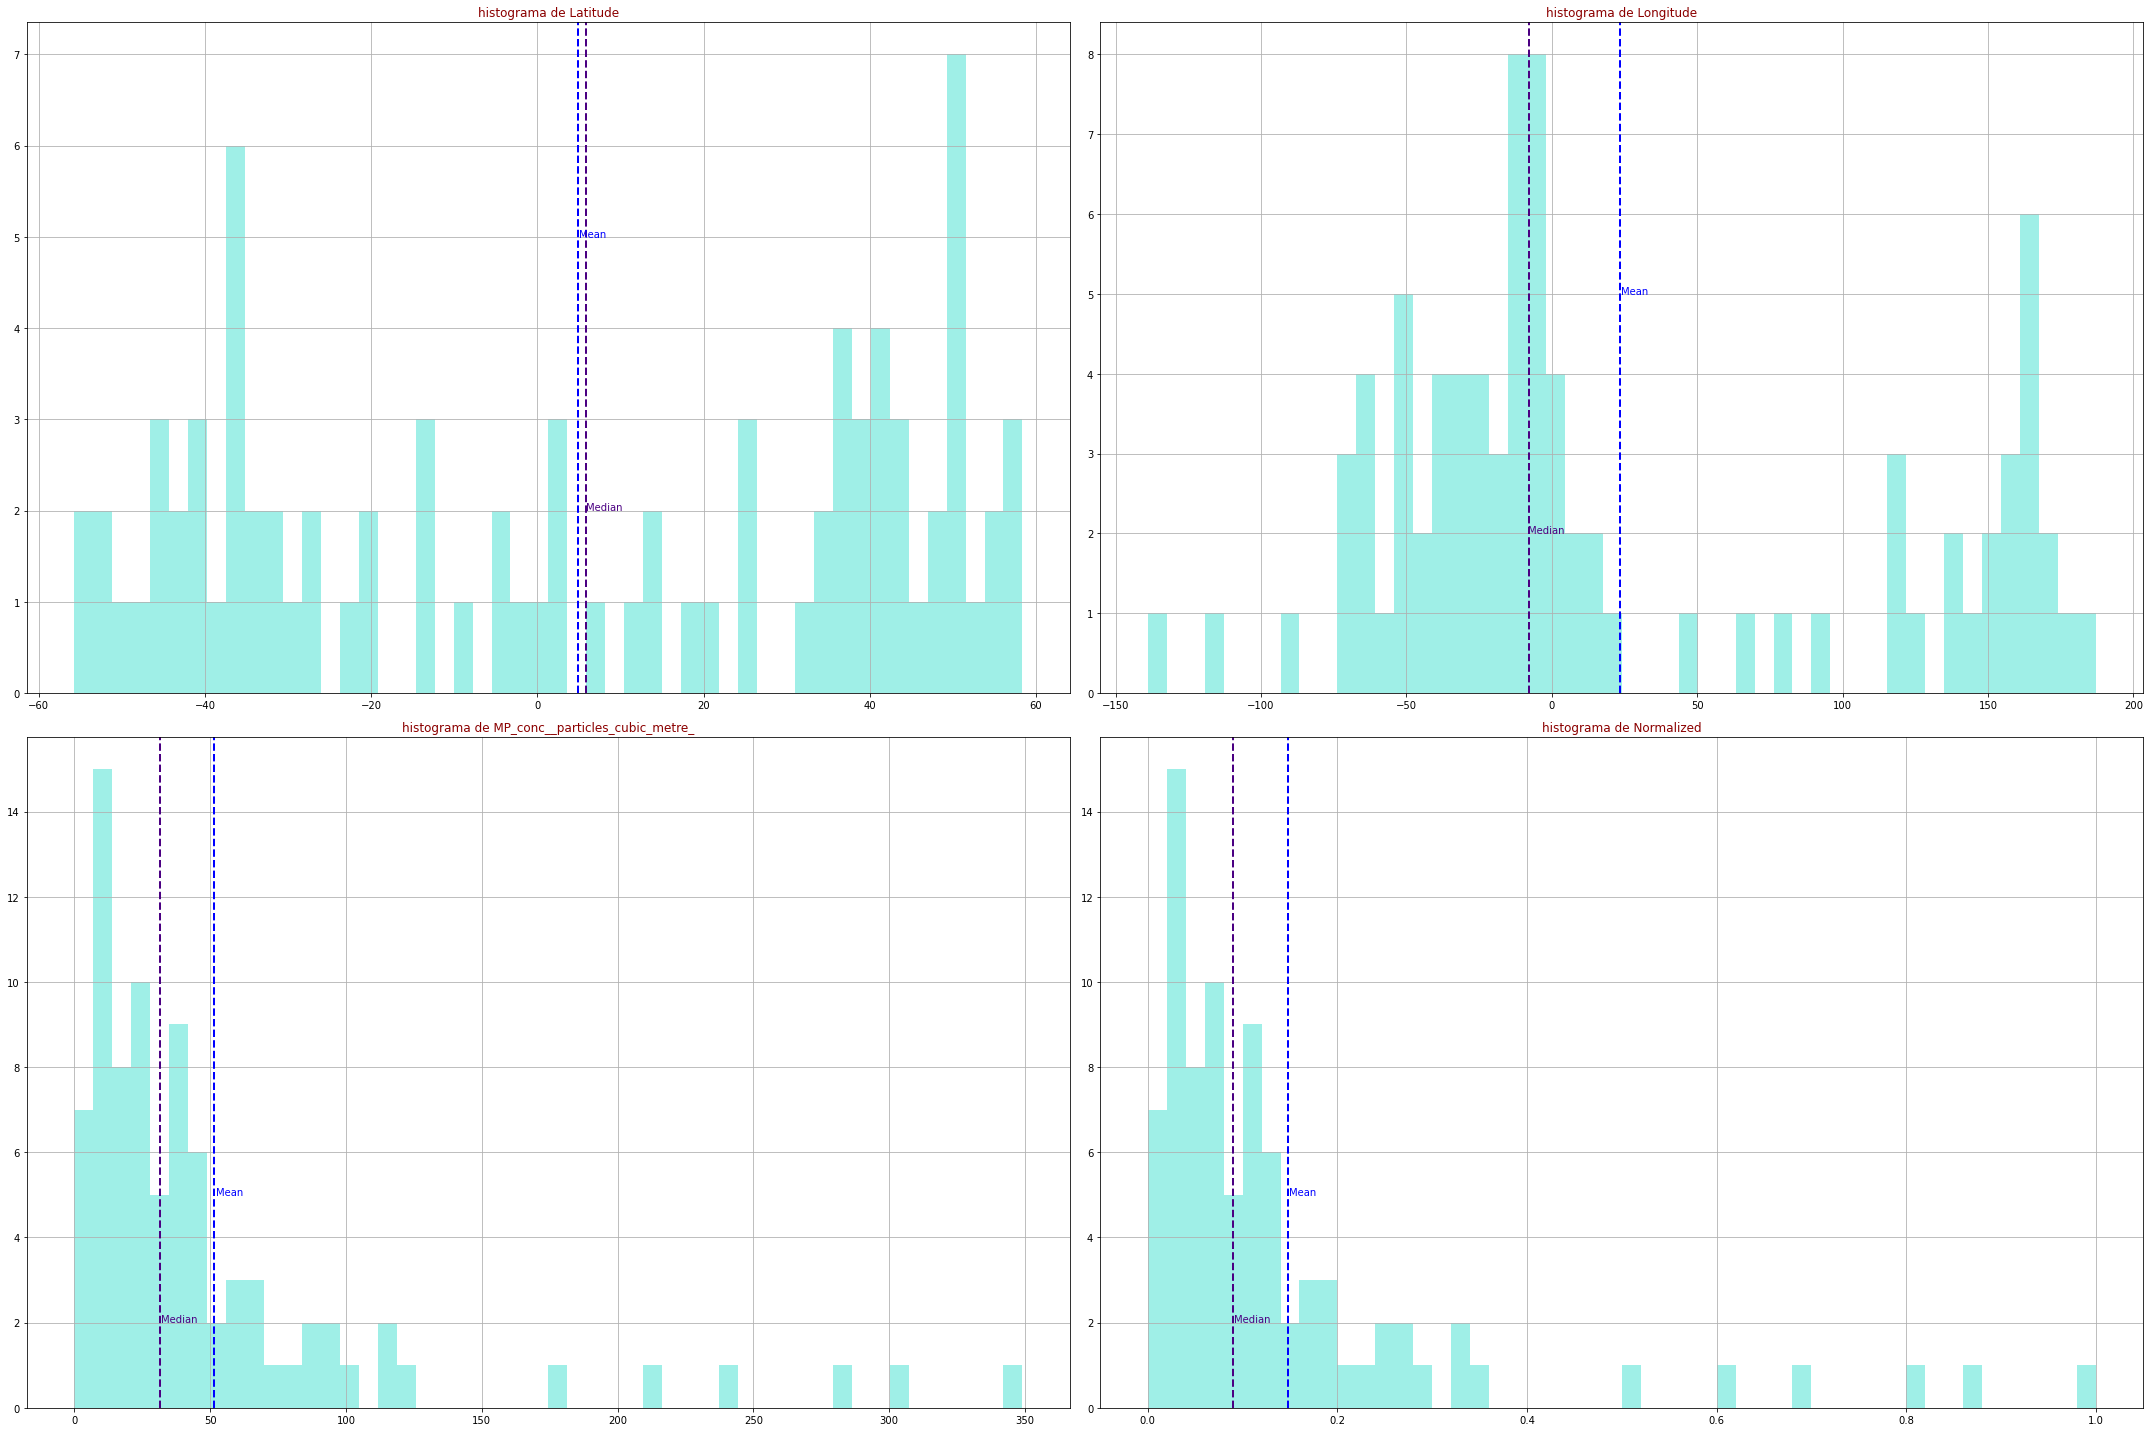

In [49]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=50,ax=ax,color='turquoise', alpha=0.5)
        verticalLine(plot1, dataframe[feature].mean(), 5, "blue", "Mean")
        verticalLine(plot1, dataframe[feature].median(), 2, "indigo", "Median")
        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_microplatic_sea,num_microplatic_sea,2,2)

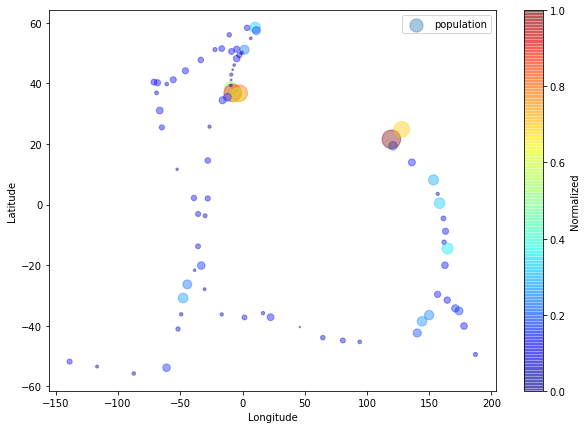

In [51]:
df_microplatic_sea.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
     s="MP_conc__particles_cubic_metre_",
    c='Normalized',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    label='population',
    figsize=(10, 7),
    alpha=0.4,
    sharex=False,
)
plt.legend()
plt.show()

In [76]:
def platic_map_visualization(df):

    start_loc= (np.mean(df['Latitude']),np.mean(df['Longitude']))

    terrain_map=folium.Map(location=start_loc,
                  zoom_start=2,
                  tiles='Stamen Terrain')

    data_dict= defaultdict(list)

    for row in df.itertuples():
        data_dict[row.Date.month].append([row.Latitude,row.Longitude,row.MP_conc__particles_cubic_metre_])

    heatmap=HeatMapWithTime(data=list(data_dict.values()),
                    index=list(data_dict.keys()),
                    radius=10,
                    min_opacity=0.1,
                    max_opacity=0.6,
                    auto_play=True,
                   control=True,
                    show=True).add_to(terrain_map)

    return terrain_map



In [77]:
terrain_map = platic_map_visualization(df_microplatic_sea)
terrain_map